In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [3]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10216 entries, 0 to 10215
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10216 non-null  object 
 1   Open       10216 non-null  float64
 2   High       10216 non-null  float64
 3   Low        10216 non-null  float64
 4   Close      10216 non-null  float64
 5   Adj Close  10216 non-null  float64
 6   Volume     10216 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 558.8+ KB


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df1 = df['Low']

In [7]:
type(df1)

pandas.core.series.Series

In [8]:
np.where(pd.isnull(df1))

(array([], dtype=int64),)

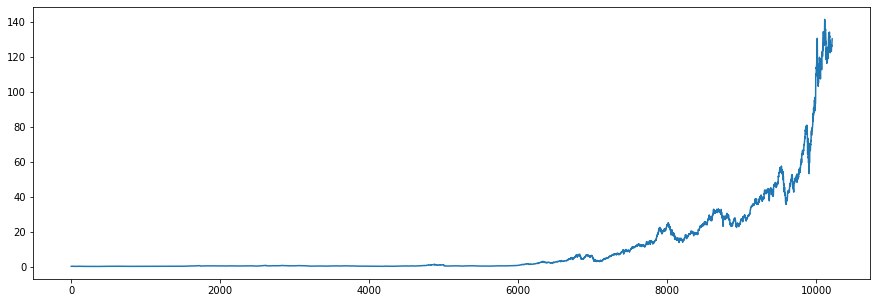

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df1);

In [10]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1[:10, :]

array([[0.00056072],
       [0.00051334],
       [0.00045015],
       [0.0004699 ],
       [0.00049359],
       [0.00054492],
       [0.00058836],
       [0.00062785],
       [0.00067918],
       [0.00077395]])

In [12]:
train_size = int(len(df1)*0.8)
test_size = len(df1) - train_size
train_data, test_data = df1[:train_size, :], df1[train_size:, :]

In [13]:
train_size, test_size

(8172, 2044)

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i: (i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [23]:
model= Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
____________________________________________________

In [19]:
X_train.shape

(8071, 100)

In [24]:
model.fit(X_train.reshape(8071, 100, 1), y_train, epochs=100, batch_size=64, shuffle=False)

Epoch 1/100
127/127 [==============================] - 34s 218ms/step - loss: 2.8060e-05
Epoch 2/100
127/127 [==============================] - 29s 231ms/step - loss: 0.0014
Epoch 3/100
127/127 [==============================] - 29s 229ms/step - loss: 0.0010
Epoch 4/100
127/127 [==============================] - 29s 229ms/step - loss: 7.6419e-04
Epoch 5/100
127/127 [==============================] - 29s 230ms/step - loss: 8.3202e-04
Epoch 6/100
127/127 [==============================] - 29s 227ms/step - loss: 8.6757e-04
Epoch 7/100
127/127 [==============================] - 29s 228ms/step - loss: 0.0011
Epoch 8/100
127/127 [==============================] - 30s 232ms/step - loss: 0.0011
Epoch 9/100
127/127 [==============================] - 29s 225ms/step - loss: 9.5159e-04
Epoch 10/100
127/127 [==============================] - 28s 223ms/step - loss: 0.0032
Epoch 11/100
127/127 [==============================] - 28s 220ms/step - loss: 0.0025
Epoch 12/100
127/127 [=====================

In [26]:
X_test.shape

(1943, 100)

In [27]:
test_predict = model.predict(X_test.reshape(1943, 100, 1))

In [30]:
print(f'MSE {mean_squared_error(y_test, test_predict)}')
print(f'R2 {r2_score(y_test, test_predict)}')

MSE 0.1408226411921899
R2 -1.9360964955028548


## Reference
_~ Stock Prediction Using Artifical Recurrent Neural Network by Kumarpal Nagar ~_